In [1]:
#Needed AND also using JD code
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import json
import csv
import os
FRvideos = "New/FRvideos.csv"

In [2]:

FR_df = pd.read_csv(FRvideos)
FR_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Ro6eob0LrCY,17.14.11,Malika LePen : Femme de Gauche - Trailer,Le Raptor Dissident,24,2017-11-13T17:32:55.000Z,"Raptor""|""Dissident""|""Expliquez""|""moi""|""cette""|...",212702,29282,1108,3817,https://i.ytimg.com/vi/Ro6eob0LrCY/default.jpg,False,False,False,Dimanche.\n18h30.\nSoyez présents pour la vidé...
1,Yo84eqYwP98,17.14.11,"LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...",Le Labo,24,2017-11-12T15:00:02.000Z,[none],432721,14053,576,1161,https://i.ytimg.com/vi/Yo84eqYwP98/default.jpg,False,False,False,Le jeu de société: https://goo.gl/hhG1Ta\n\nGa...
2,ceqntSXE-10,17.14.11,DESSINS ANIMÉS FRANÇAIS VS RUSSES 2 - Daniil...,Daniil le Russe,23,2017-11-13T17:00:38.000Z,"cartoon""|""pokémon""|""école""|""ours""|""мультфильм",482153,76203,477,9580,https://i.ytimg.com/vi/ceqntSXE-10/default.jpg,False,False,False,Une nouvelle dose de dessins animés français e...
3,WuTFI5qftCE,17.14.11,PAPY GRENIER - METAL GEAR SOLID,Joueur Du Grenier,20,2017-11-12T17:00:02.000Z,"Papy grenier""|""Metal Gear Solid""|""PS1""|""Tirage...",925222,85016,550,4303,https://i.ytimg.com/vi/WuTFI5qftCE/default.jpg,False,False,False,"Nouvel ,épisode de Papy Grenier ! Ce mois-ci o..."
4,ee6OFs8TdEg,17.14.11,QUI SAUTERA LE PLUS HAUT ? (VÉLO SKATE ROLLER ...,Aurelien Fontenoy,17,2017-11-13T16:30:03.000Z,"vélo""|""vtt""|""bmx""|""freestyle""|""bike""|""mtb""|""di...",141695,8091,72,481,https://i.ytimg.com/vi/ee6OFs8TdEg/default.jpg,False,False,False,Sauts à plus de 4 mètres de haut dans un tramp...


In [3]:
# reading the json file
file = open("FR_category_id.json")
FRjson = json.load(file)

In [4]:
# looping through the json file and replacing the category id with the category name
length = len(FRjson["items"])
length



31

In [8]:
FR_df["category_id"] = FR_df["category_id"].astype(str)

for x in range(length):
    id_number = FRjson["items"][x]["id"]
    category_name = FRjson["items"][x]["snippet"]["title"]
    FR_df["category_id"] = FR_df["category_id"].replace({f"{id_number}": f"{category_name}"})
    
FR_df["category_id"] = FR_df["category_id"].replace({"29": "Nonprofits & Activism"})
    
FR_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Ro6eob0LrCY,17.14.11,Malika LePen : Femme de Gauche - Trailer,Le Raptor Dissident,Entertainment,2017-11-13T17:32:55.000Z,"Raptor""|""Dissident""|""Expliquez""|""moi""|""cette""|...",212702,29282,1108,3817,https://i.ytimg.com/vi/Ro6eob0LrCY/default.jpg,False,False,False,Dimanche.\n18h30.\nSoyez présents pour la vidé...
1,Yo84eqYwP98,17.14.11,"LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...",Le Labo,Entertainment,2017-11-12T15:00:02.000Z,[none],432721,14053,576,1161,https://i.ytimg.com/vi/Yo84eqYwP98/default.jpg,False,False,False,Le jeu de société: https://goo.gl/hhG1Ta\n\nGa...
2,ceqntSXE-10,17.14.11,DESSINS ANIMÉS FRANÇAIS VS RUSSES 2 - Daniil...,Daniil le Russe,Comedy,2017-11-13T17:00:38.000Z,"cartoon""|""pokémon""|""école""|""ours""|""мультфильм",482153,76203,477,9580,https://i.ytimg.com/vi/ceqntSXE-10/default.jpg,False,False,False,Une nouvelle dose de dessins animés français e...
3,WuTFI5qftCE,17.14.11,PAPY GRENIER - METAL GEAR SOLID,Joueur Du Grenier,Gaming,2017-11-12T17:00:02.000Z,"Papy grenier""|""Metal Gear Solid""|""PS1""|""Tirage...",925222,85016,550,4303,https://i.ytimg.com/vi/WuTFI5qftCE/default.jpg,False,False,False,"Nouvel ,épisode de Papy Grenier ! Ce mois-ci o..."
4,ee6OFs8TdEg,17.14.11,QUI SAUTERA LE PLUS HAUT ? (VÉLO SKATE ROLLER ...,Aurelien Fontenoy,Sports,2017-11-13T16:30:03.000Z,"vélo""|""vtt""|""bmx""|""freestyle""|""bike""|""mtb""|""di...",141695,8091,72,481,https://i.ytimg.com/vi/ee6OFs8TdEg/default.jpg,False,False,False,Sauts à plus de 4 mètres de haut dans un tramp...


In [9]:


# this shows how many videos of each category is present in the data
FR_count_df = pd.DataFrame(FR_df.groupby("category_id").count(), columns=["video_id"])
FR_count_df = FR_count_df.rename(columns={"video_id": "count"})
FR_count_df.sort_values(by=["count"], ascending=False)



,count
category_id,
Entertainment,9819
People & Blogs,5719
Comedy,4343
Sports,4342
Music,3946
News & Politics,3752
Howto & Style,2361
Film & Animation,2157
Gaming,1459


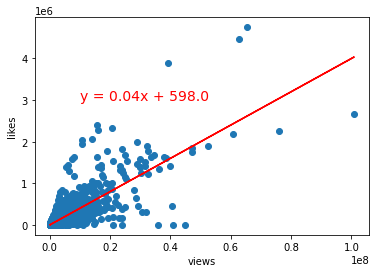

In [10]:
# separate dataframe using just the numerical value columns
# this is probably not too needed
FR_dateview_df = pd.DataFrame(FR_df, columns=["trending_date", "views", "likes", "dislikes", "comment_count"])


# views vs likes on all videos
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(FR_dateview_df["views"], FR_dateview_df["likes"])
regress_value = FR_dateview_df["views"] * slope + intercept
line_eq = f"y = {round(slope, 4)}x + {round(intercept, 0)}"
plt.plot(FR_dateview_df["views"], regress_value, "r-")
plt.annotate(line_eq, (1e7, 3e6), fontsize=14, color="red")
plt.scatter(FR_dateview_df["views"], FR_dateview_df["likes"])
plt.xlabel("views")
plt.ylabel("likes")
plt.show()



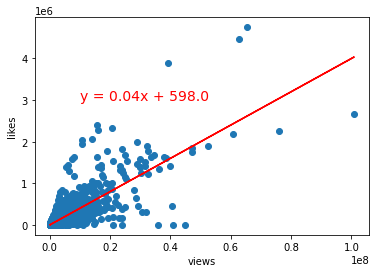

In [11]:
# views vs likes on all videos
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(FR_dateview_df["views"], FR_dateview_df["likes"])
regress_value = FR_dateview_df["views"] * slope + intercept
line_eq = f"y = {round(slope, 4)}x + {round(intercept, 0)}"
plt.plot(FR_dateview_df["views"], regress_value, "r-")
plt.annotate(line_eq, (1e7, 3e6), fontsize=14, color="red")
plt.scatter(FR_dateview_df["views"], FR_dateview_df["likes"])
plt.xlabel("views")
plt.ylabel("likes")
plt.show()

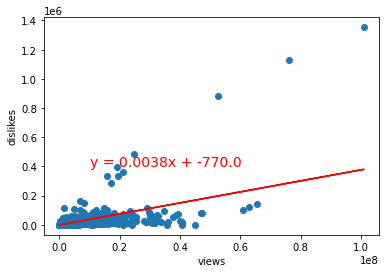

In [14]:


# views vs dislikes on all videos
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(FR_dateview_df["views"], FR_dateview_df["dislikes"])
regress_value = FR_dateview_df["views"] * slope + intercept
line_eq = f"y = {round(slope, 4)}x + {round(intercept, 0)}"
plt.plot(FR_dateview_df["views"], regress_value, "r-")
plt.annotate(line_eq, (1e7, 4e5), fontsize=14, color="red")
plt.scatter(FR_dateview_df["views"], FR_dateview_df["dislikes"])
plt.xlabel("views")
plt.ylabel("dislikes")
plt.show()



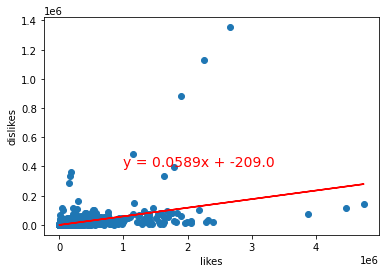

In [15]:
# likes vs dislikes on all videos
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(FR_dateview_df["likes"], FR_dateview_df["dislikes"])
regress_value = FR_dateview_df["likes"] * slope + intercept
line_eq = f"y = {round(slope, 4)}x + {round(intercept, 0)}"
plt.plot(FR_dateview_df["likes"], regress_value, "r-")
plt.annotate(line_eq, (1e6, 4e5), fontsize=14, color="red")
plt.scatter(FR_dateview_df["likes"], FR_dateview_df["dislikes"])
plt.xlabel("likes")
plt.ylabel("dislikes")
plt.show()

In [16]:


# shows how many videos on which category has the comments/ratings disabled, and video removed
FR_no_comment_df = FR_df.loc[FR_df["comments_disabled"] == True, :]
FR_no_rate_df = FR_df.loc[FR_df["ratings_disabled"] == True, :]
FR_no_video_df = FR_df.loc[FR_df["video_error_or_removed"] == True, :]

#FR_no_comment_df["category_id"].value_counts()
#FR_no_rate_df["category_id"].value_counts()
FR_no_video_df["category_id"].value_counts()



Film & Animation    7
Entertainment       5
News & Politics     3
Music               2
Pets & Animals      1
People & Blogs      1
Comedy              1
Autos & Vehicles    1
Gaming              1
Name: category_id, dtype: int64

In [17]:
FR_no_video_df.describe()

,views,likes,dislikes,comment_count
count,2.200000e+01,22.000000,22.000000,22.000000
mean,4.323743e+05,15900.272727,537.681818,1022.818182
std,7.549059e+05,32769.880742,1043.343727,2235.521727
min,6.771000e+03,0.000000,0.000000,9.000000
25%,4.305800e+04,365.750000,28.750000,33.000000
50%,1.490200e+05,1921.000000,90.500000,225.500000
75%,3.914615e+05,7596.250000,329.250000,639.500000
max,3.418472e+06,117998.000000,3751.000000,9757.000000


In [18]:


# shows which channel
FR_df["channel_title"].value_counts()



Troom Troom FR         195
Elhiwar Ettounsi       181
sam zirah              173
Lama Faché             171
Marodi TV Sénégal      169
                      ... 
Unravel                  1
Fabregas Métis Noir      1
SnS__7                   1
Madame Monsieur          1
Itsme Madd               1
Name: channel_title, Length: 6680, dtype: int64